# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных
## 1) Текстовое описание набора данных

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

/tmp/ipykernel_3725/2580466859.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_raw=pd.read_csv('datasets/melb_data.csv',sep=",")

In [3]:
data_raw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
data_raw.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
total_count = data_raw.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 13580


# 2.1)Обратобка пропусков в данных
## Удаление или заполнение нулями

In [6]:
data=data_raw.dropna(axis=0,how='any')
(data_raw.shape,data.shape)

((13580, 21), (6196, 21))

In [7]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


## Заполнение пропусков нулями

In [34]:
data=data_raw.fillna(0)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,0.0,0.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,0.0,0.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Импьютация

In [38]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data_raw.columns:
    # Количество пустых значений 
    temp_null_count = data_raw[data_raw[col].isnull()].shape[0]
    dt = str(data_raw[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Car. Тип данных float64. Количество пустых значений 62, 0.46%.
Колонка BuildingArea. Тип данных float64. Количество пустых значений 6450, 47.5%.
Колонка YearBuilt. Тип данных float64. Количество пустых значений 5375, 39.58%.


In [39]:
data_num = data_raw[num_cols]
data_num

,Car,BuildingArea,YearBuilt
0,1.0,NaN,NaN
1,0.0,79.0,1900.0
2,0.0,150.0,1900.0
3,1.0,NaN,NaN
4,2.0,142.0,2014.0
...,...,...,...
13575,2.0,NaN,1981.0
13576,2.0,133.0,1995.0
13577,4.0,NaN,1997.0
13578,5.0,157.0,1920.0


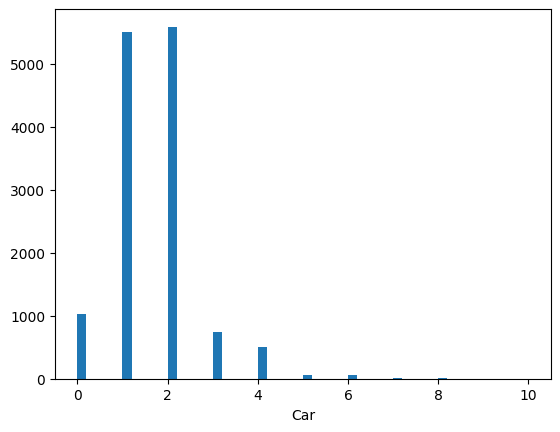

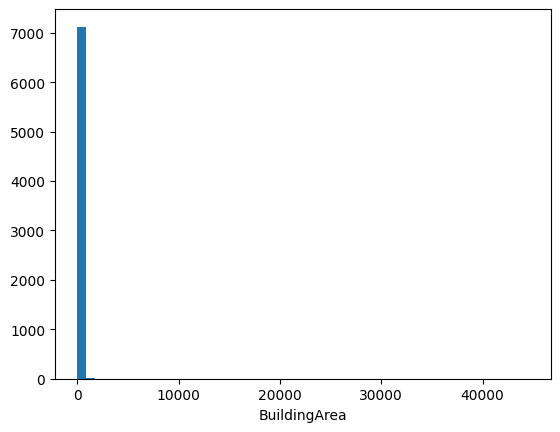

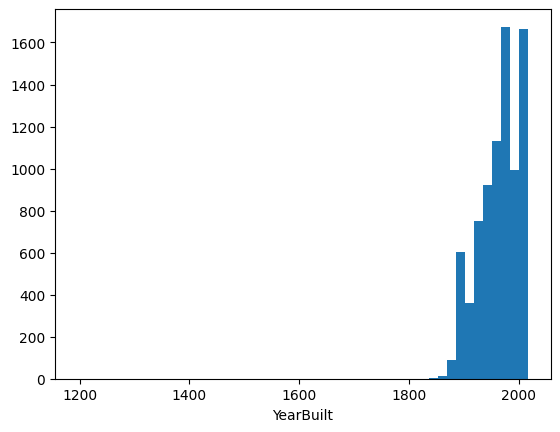

In [40]:
for col in data_num:
    plt.hist(data_raw[col], 50)
    plt.xlabel(col)
    plt.show()

In [45]:
data_num_YearBuilt = data_num[['YearBuilt']]
data_num_YearBuilt.head()

,YearBuilt
0,NaN
1,1900.0
2,1900.0
3,NaN
4,2014.0


In [46]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_YearBuilt)
mask_missing_values_only

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [47]:
strategies=['mean', 'median', 'most_frequent']

In [48]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [49]:
data_raw[['BuildingArea']].describe()

,BuildingArea
count,7130.000000
mean,151.967650
std,541.014538
min,0.000000
25%,93.000000
50%,126.000000
75%,174.000000
max,44515.000000


In [50]:
test_num_impute_col(data_raw, 'BuildingArea', strategies[0])

('BuildingArea', 'mean', 6450, 151.96764988779805, 151.96764988779805)

## Обработка признаков в категориальных данных

In [51]:
cat_cols = []
for col in data_raw.columns:
    # Количество пустых значений 
    temp_null_count = data_raw[data_raw[col].isnull()].shape[0]
    dt = str(data_raw[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка CouncilArea. Тип данных object. Количество пустых значений 1369, 10.08%.


In [66]:
cat_temp_data = data_raw[['CouncilArea']]
cat_temp_data.head()

,CouncilArea
0,Yarra
1,Yarra
2,Yarra
3,Yarra
4,Yarra


In [67]:
cat_temp_data['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [68]:

cat_temp_data[cat_temp_data['CouncilArea'].isnull()].shape

(1369, 1)

In [69]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Yarra'],
       ['Yarra'],
       ['Yarra'],
       ...,
       ['Moreland'],
       ['Moreland'],
       ['Moreland']], dtype=object)

In [70]:
np.unique(data_imp2)

array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
       'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
       'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
       'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
       'Monash', 'Moonee Valley', 'Moorabool', 'Moreland', 'Nillumbik',
       'Port Phillip', 'Stonnington', 'Unavailable', 'Whitehorse',
       'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'], dtype=object)

In [60]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Yarra'],
       ['Yarra'],
       ['Yarra'],
       ...,
       ['NA'],
       ['NA'],
       ['NA']], dtype=object)

In [61]:
np.unique(data_imp3)

array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
       'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
       'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
       'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
       'Monash', 'Moonee Valley', 'Moorabool', 'Moreland', 'NA',
       'Nillumbik', 'Port Phillip', 'Stonnington', 'Unavailable',
       'Whitehorse', 'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'],
      dtype=object)

## Преобразование категориальных признаков в числовые
## ONEHOT

In [73]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Yarra
1,Yarra
2,Yarra
3,Yarra
4,Yarra
...,...
13575,Moreland
13576,Moreland
13577,Moreland
13578,Moreland


In [72]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [75]:

cat_enc.shape

(13580, 1)

In [77]:
cat_enc_ohe.shape

(13580, 33)

In [80]:
cat_enc_ohe.todense()[0:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.]])

In [82]:
cat_enc.head(5)

,c1
0,Yarra
1,Yarra
2,Yarra
3,Yarra
4,Yarra


In [83]:
pd.get_dummies(cat_enc).head()

,c1_Banyule,c1_Bayside,c1_Boroondara,c1_Brimbank,c1_Cardinia,c1_Casey,c1_Darebin,c1_Frankston,c1_Glen Eira,c1_Greater Dandenong,...,c1_Moreland,c1_Nillumbik,c1_Port Phillip,c1_Stonnington,c1_Unavailable,c1_Whitehorse,c1_Whittlesea,c1_Wyndham,c1_Yarra,c1_Yarra Ranges
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [84]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,...,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,CouncilArea_nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Масштабирование данных

In [86]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price']])

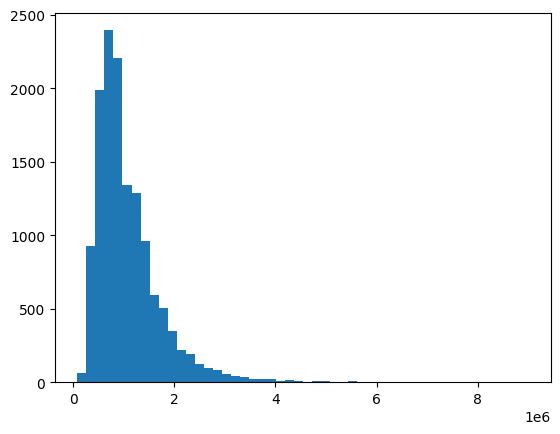

In [87]:
plt.hist(data['Price'], 50)
plt.show()

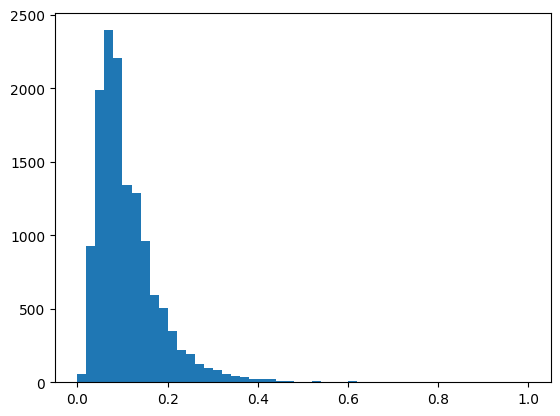

In [88]:
plt.hist(sc1_data, 50)
plt.show()

In [89]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price']])

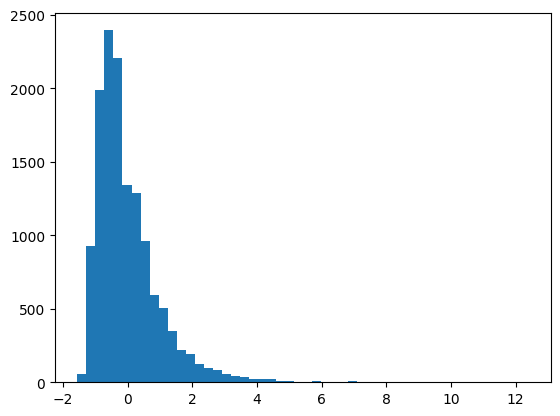

In [90]:
plt.hist(sc2_data, 50)
plt.show()